<a href="https://colab.research.google.com/github/CarrenP/datamining/blob/main/ALP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn import tree
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN

# Load Dataset

In [62]:
df_ori = pd.read_csv ('https://raw.githubusercontent.com/Livanty/DatasetW2/refs/heads/main/ecommerce_sales_analysis.csv')
df_ori.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [63]:
df_ori.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


### **Data Cleaning**

In [64]:
df_ori.isnull().sum()

,0
product_id,0
product_name,0
category,0
price,0
review_score,0
review_count,0
sales_month_1,0
sales_month_2,0
sales_month_3,0
sales_month_4,0


In [65]:
df_ori.drop(['product_name'], axis=1, inplace=True)
df_ori.head()

,product_id,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [66]:
# Menghitung rata-rata penjualan per bulan
df_ori['avg_sales'] = df_ori[['sales_month_1', 'sales_month_2', 'sales_month_3',
                      'sales_month_4', 'sales_month_5', 'sales_month_6',
                      'sales_month_7', 'sales_month_8', 'sales_month_9',
                      'sales_month_10', 'sales_month_11', 'sales_month_12']].mean(axis=1)

In [67]:
df_ori.duplicated().value_counts()

,count
False,1000


### **Data Preparation - Transformation**

In [68]:
label_encoder = LabelEncoder()
df = df_ori.copy()
df['category'] = label_encoder.fit_transform(df['category'])
df.head()

,product_id,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,avg_sales
0,1,1,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,535.083333
1,2,4,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,502.250000
2,3,6,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,465.000000
3,4,6,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,418.500000
4,5,0,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,507.833333


In [69]:
sc = MinMaxScaler()
df= pd.DataFrame(sc.fit_transform(df), columns=['product_id', 'category', 'price', 'review_score', 'review_count',
    'sales_month_1', 'sales_month_2', 'sales_month_3',
    'sales_month_4', 'sales_month_5', 'sales_month_6',
    'sales_month_7', 'sales_month_8', 'sales_month_9',
    'sales_month_10', 'sales_month_11', 'sales_month_12', 'avg_sales'])
df.head()

,product_id,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,avg_sales
0,0.000000,0.166667,0.371744,0.175,0.219439,0.479,0.447896,0.092092,0.784,0.604,0.904,0.446,0.601005,0.807,0.251251,0.695,0.303213,0.558181
1,0.001001,0.666667,0.950748,0.550,0.903808,0.021,0.988978,0.861862,0.863,0.524,0.128,0.610,0.433166,0.176,0.293293,0.772,0.350402,0.494417
2,0.002002,1.000000,0.730962,0.875,0.162325,0.348,0.557114,0.567568,0.143,0.771,0.409,0.290,0.827136,0.340,0.666667,0.267,0.389558,0.422075
3,0.003003,1.000000,0.596971,0.725,0.951904,0.725,0.677355,0.059059,0.015,0.937,0.421,0.670,0.932663,0.056,0.156156,0.168,0.199799,0.331769
4,0.004004,0.000000,0.152141,0.800,0.219439,0.682,0.449900,0.649650,0.301,0.620,0.293,0.411,0.254271,0.854,0.547548,0.770,0.254016,0.505260


# **EDA**

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   float64
 1   category        1000 non-null   float64
 2   price           1000 non-null   float64
 3   review_score    1000 non-null   float64
 4   review_count    1000 non-null   float64
 5   sales_month_1   1000 non-null   float64
 6   sales_month_2   1000 non-null   float64
 7   sales_month_3   1000 non-null   float64
 8   sales_month_4   1000 non-null   float64
 9   sales_month_5   1000 non-null   float64
 10  sales_month_6   1000 non-null   float64
 11  sales_month_7   1000 non-null   float64
 12  sales_month_8   1000 non-null   float64
 13  sales_month_9   1000 non-null   float64
 14  sales_month_10  1000 non-null   float64
 15  sales_month_11  1000 non-null   float64
 16  sales_month_12  1000 non-null   float64
 17  avg_sales       1000 non-null   fl

In [71]:
df.describe()

,product_id,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,avg_sales
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.500000,0.500667,0.488026,0.506900,0.526559,0.498306,0.506674,0.507246,0.503823,0.487194,0.491653,0.507011,0.502079,0.491934,0.514312,0.505838,0.498380,0.493269
std,0.289109,0.340921,0.293579,0.292811,0.282836,0.289941,0.286566,0.294305,0.286646,0.287844,0.289234,0.291047,0.291403,0.287515,0.288999,0.288825,0.279628,0.160588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.166667,0.232495,0.250000,0.283317,0.245500,0.261022,0.243994,0.261500,0.221000,0.236000,0.254000,0.236683,0.247250,0.266266,0.251250,0.256024,0.391649
50%,0.500000,0.500000,0.494610,0.525000,0.543086,0.507500,0.507014,0.493493,0.501500,0.497000,0.479500,0.522500,0.496985,0.495500,0.531532,0.502000,0.498494,0.488752
75%,0.750000,0.833333,0.743336,0.750000,0.772545,0.740750,0.755762,0.778028,0.749500,0.727000,0.740500,0.757250,0.761055,0.735250,0.770020,0.761000,0.728916,0.600097
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
df_class = df.copy()

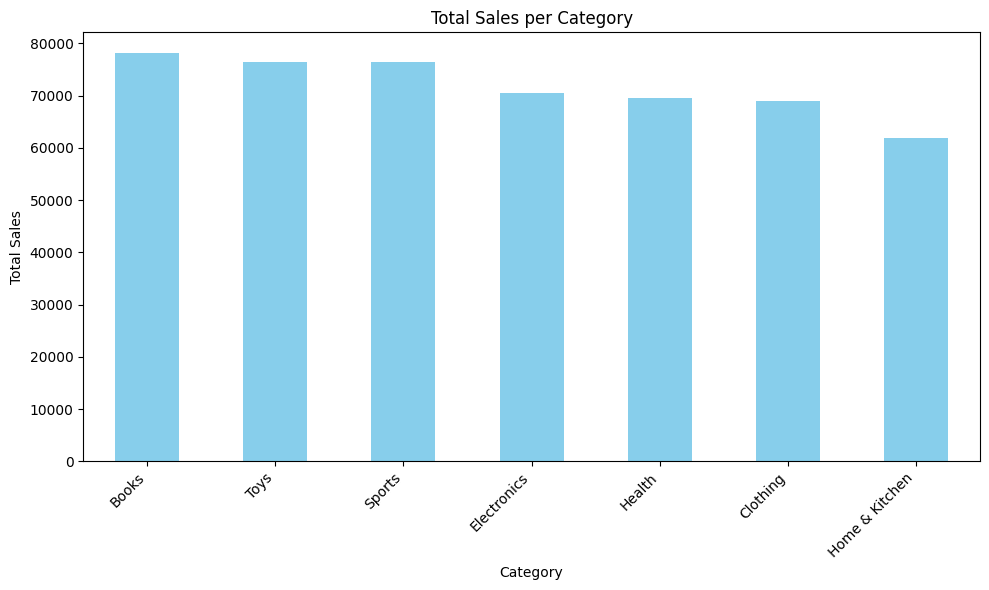

In [73]:
import matplotlib.pyplot as plt


# Group by category and sum the total sales for each category
category_sales = df_ori.groupby('category')['avg_sales'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


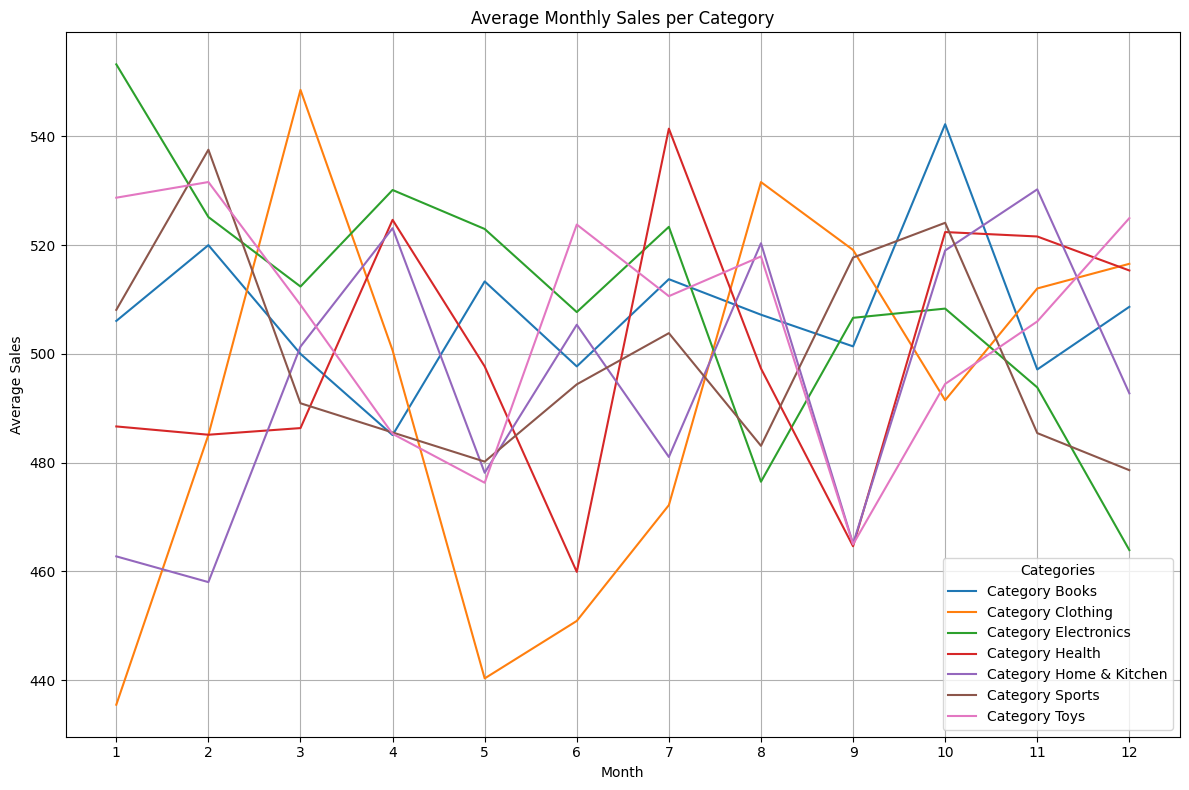

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_inverse contains your original data with 'avg_sales' and 'category' columns

# Melt the DataFrame to long format
df_melted = df_ori.melt(
    id_vars=['product_id', 'category'],
    value_vars=[f'sales_month_{i}' for i in range(1, 13)],  # Only sales month columns
    var_name='Month',
    value_name='Sales'
)

# Convert 'Month' to integer
df_melted['Month'] = df_melted['Month'].str.replace('sales_month_', '').astype(int)

# Group by category and month to calculate average sales
avg_sales_by_category = df_melted.groupby(['category', 'Month'])['Sales'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 8))
for category in avg_sales_by_category['category'].unique():
    category_data = avg_sales_by_category[avg_sales_by_category['category'] == category]
    plt.plot(category_data['Month'], category_data['Sales'], label=f'Category {category}')

plt.title('Average Monthly Sales per Category')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13))
plt.legend(title='Categories')
plt.grid(True)
plt.tight_layout()
plt.show()

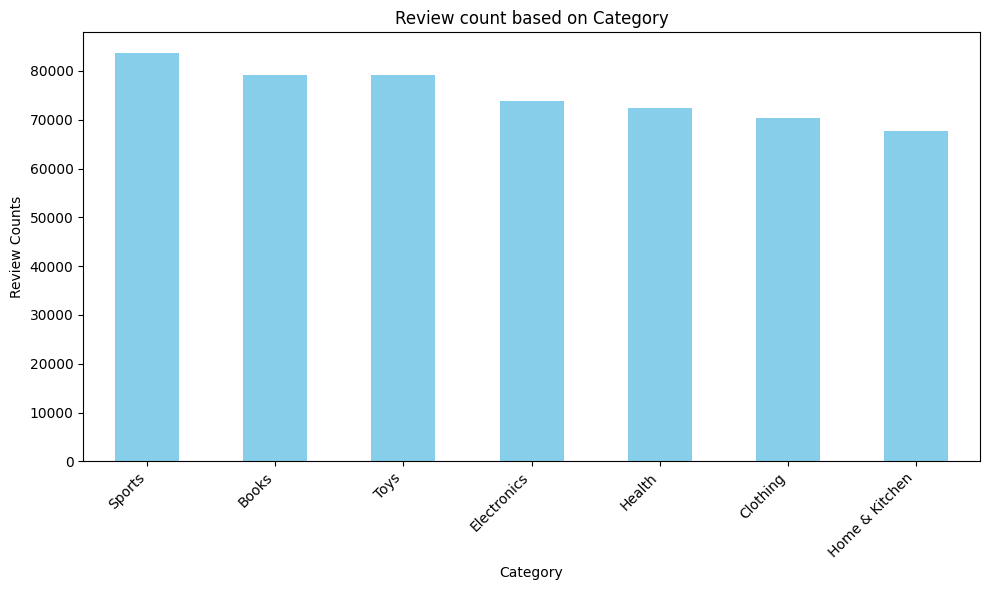

In [75]:
import matplotlib.pyplot as plt


# Group by category and sum the total sales for each category
category_sales = df_ori.groupby('category')['review_count'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Review count based on Category')
plt.xlabel('Category')
plt.ylabel('Review Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **K-Means Clustering**

In [76]:
# set the parameter for evaluating K

# set the parameter for evaluating K
sse = []
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

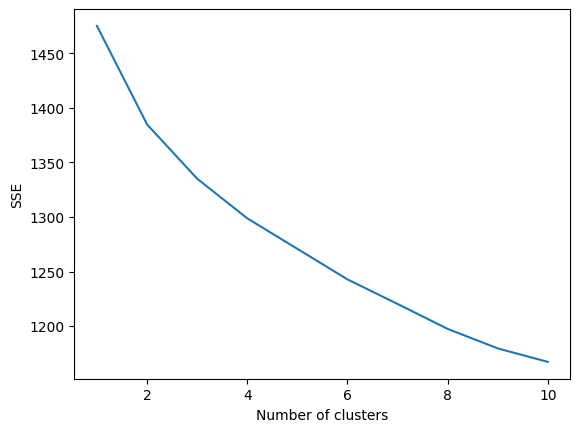

In [77]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [78]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("The best k for your model is", kneedle.elbow)

The best k for your model is 4


In [79]:

kmeans = KMeans(n_clusters=4, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df)
y_pred

array([2, 0, 0, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 3, 2, 0, 0, 3, 2, 3, 3, 2, 0, 3,
       1, 0, 0, 0, 2, 0, 2, 2, 3, 3, 2, 2, 2, 2, 1, 2, 2, 0, 3, 1, 2, 2,
       0, 2, 1, 1, 3, 0, 2, 1, 0, 3, 0, 0, 2, 2, 0, 2, 2, 3, 2, 0, 3, 0,
       3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1,
       2, 0, 1, 3, 0, 1, 1, 0, 1, 3, 0, 2, 2, 2, 0, 2, 3, 2, 1, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 1, 3, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 3, 3, 3, 1, 1, 2, 3, 0, 1, 2, 2, 3, 0, 3, 2, 1,
       2, 2, 0, 3, 2, 2, 3, 3, 1, 1, 1, 2, 0, 3, 3, 0, 2, 3, 1, 1, 3, 3,
       2, 2, 2, 0, 3, 2, 3, 1, 3, 2, 1, 2, 2, 2, 3, 0, 3, 2, 1, 2, 2, 1,
       3, 0, 0, 3, 0, 3, 3, 3, 1, 2, 3, 3, 0, 2, 2, 0, 0, 1, 3, 3, 0, 1,
       0, 1, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 0, 0, 3, 0, 3, 0, 2, 3, 2, 3,
       3, 1, 0, 2, 3, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 3, 2, 0, 2, 0, 1,
       3, 3, 2, 3, 3, 0, 1, 2, 2, 0, 3, 0, 3, 0, 0,

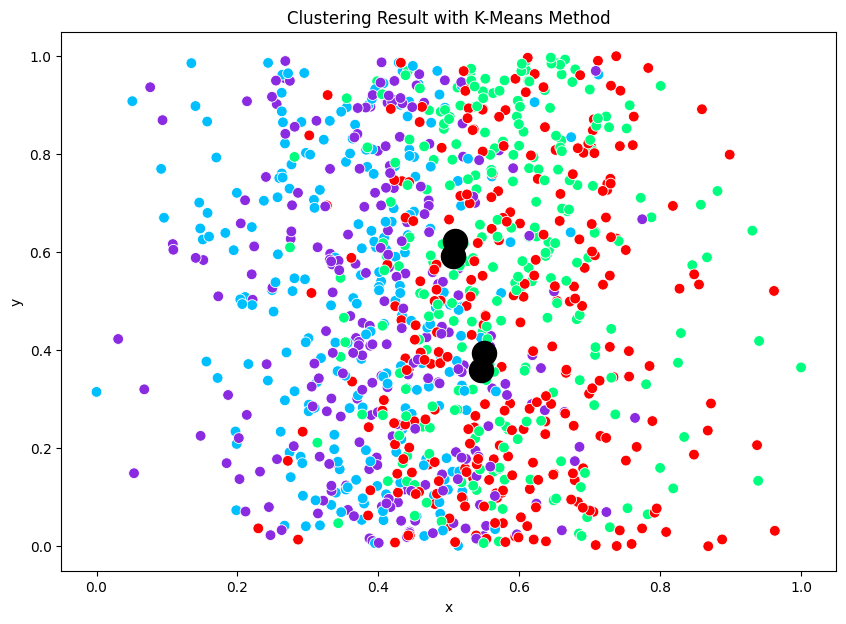

In [80]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))


sns.scatterplot(x="avg_sales", y="price", hue=y_pred, palette=[
    "blueviolet",
    "red",
    "deepskyblue",
    "springgreen"
], legend=None, data=df, s=60)

plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=300, c="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [81]:
df.head()

,product_id,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,avg_sales
0,0.000000,0.166667,0.371744,0.175,0.219439,0.479,0.447896,0.092092,0.784,0.604,0.904,0.446,0.601005,0.807,0.251251,0.695,0.303213,0.558181
1,0.001001,0.666667,0.950748,0.550,0.903808,0.021,0.988978,0.861862,0.863,0.524,0.128,0.610,0.433166,0.176,0.293293,0.772,0.350402,0.494417
2,0.002002,1.000000,0.730962,0.875,0.162325,0.348,0.557114,0.567568,0.143,0.771,0.409,0.290,0.827136,0.340,0.666667,0.267,0.389558,0.422075
3,0.003003,1.000000,0.596971,0.725,0.951904,0.725,0.677355,0.059059,0.015,0.937,0.421,0.670,0.932663,0.056,0.156156,0.168,0.199799,0.331769
4,0.004004,0.000000,0.152141,0.800,0.219439,0.682,0.449900,0.649650,0.301,0.620,0.293,0.411,0.254271,0.854,0.547548,0.770,0.254016,0.505260


In [82]:
# Inverse transform the scaled data to get the original values
df_inverse = pd.DataFrame(sc.inverse_transform(df), columns=['product_id', 'category', 'price', 'review_score', 'review_count',
    'sales_month_1', 'sales_month_2', 'sales_month_3',
    'sales_month_4', 'sales_month_5', 'sales_month_6',
    'sales_month_7', 'sales_month_8', 'sales_month_9',
    'sales_month_10', 'sales_month_11', 'sales_month_12', 'avg_sales'])
# Add the cluster labels to the original data
df_inverse['Cluster'] = y_pred
# Analyze the clusters with the original values
df_inverse.head()

,product_id,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,avg_sales,Cluster
0,1.0,1.0,190.40,1.7,220.0,479.0,449.0,92.0,784.0,604.0,904.0,446.0,603.0,807.0,252.0,695.0,306.0,535.083333,2
1,2.0,4.0,475.60,3.2,903.0,21.0,989.0,861.0,863.0,524.0,128.0,610.0,436.0,176.0,294.0,772.0,353.0,502.250000,0
2,3.0,6.0,367.34,4.5,163.0,348.0,558.0,567.0,143.0,771.0,409.0,290.0,828.0,340.0,667.0,267.0,392.0,465.000000,0
3,4.0,6.0,301.34,3.9,951.0,725.0,678.0,59.0,15.0,937.0,421.0,670.0,933.0,56.0,157.0,168.0,203.0,418.500000,0
4,5.0,0.0,82.23,4.2,220.0,682.0,451.0,649.0,301.0,620.0,293.0,411.0,258.0,854.0,548.0,770.0,257.0,507.833333,2


In [86]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

cluster_summary = df_inverse.groupby(y_pred).agg({
    'price': ['mean', 'std', 'min', 'max', mode],           # Harga produk
    'review_score': ['mean', 'std', 'min', 'max', mode],    # Skor ulasan
    'review_count': ['mean', 'std', 'min', 'max', mode],    # Jumlah ulasan
    'sales_month_1': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan pertama
    'sales_month_2': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan kedua
    'sales_month_3': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan ketiga
    'sales_month_4': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan keempat
    'sales_month_5': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan kelima
    'sales_month_6': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan keenam
    'sales_month_7': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan ketujuh
    'sales_month_8': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan kedelapan
    'sales_month_9': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan kesembilan
    'sales_month_10': ['mean', 'std', 'min', 'max', mode],  # Penjualan bulan kesepuluh
    'sales_month_11': ['mean', 'std', 'min', 'max', mode],  # Penjualan bulan kesebelas
    'sales_month_12': ['mean', 'std', 'min', 'max', mode],  # Penjualan bulan terakhir
    'avg_sales': ['mean', 'std', 'min', 'max', mode]
})
cluster_summary = cluster_summary.T

# Ubah nama klaster menjadi 'Cluster 0', 'Cluster 1', dll.
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]

# Menambahkan nama 'KMeans' pada level pertama kolom
cluster_summary.columns.name = 'KMeans'

# Menampilkan hasi
cluster_summary

KMeans                 Cluster 0    Cluster 1    Cluster 2    Cluster 3
price          mean   232.404008   220.536134   254.262869   284.096732
               std    143.657719   146.678591   138.445643   141.505915
               min     10.620000     7.290000     7.730000    10.440000
               max    495.030000   499.860000   493.390000   498.450000
               mode   159.300000   248.850000     7.730000   400.710000
review_score   mean     2.910970     2.858736     3.278481     3.080545
               std      1.158702     1.133335     1.216205     1.141789
               min      1.000000     1.000000     1.000000     1.000000
               max      5.000000     5.000000     5.000000     5.000000
               mode     4.500000     3.900000     4.500000     3.500000
review_count   mean   549.746835   505.408922   546.109705   509.077821
               std    282.702985   288.656648   270.603086   284.403079
               min      1.000000    19.000000     8.000000     1.000000
               max    999.000000   998.000000   991.000000   998.000000
               mode   533.000000    41.000000   220.000000   659.000000
sales_month_1  mean   394.476793   593.007435   360.282700   622.214008
               std    280.972895   264.824569   263.063633   256.138903
               min      2.000000     3.000000     0.000000    11.000000
               max    987.000000   996.000000  1000.000000   999.000000
               mode   108.000000   752.000000    12.000000   725.000000
sales_month_2  mean   579.890295   619.925651   393.324895   428.984436
               std    269.834013   278.093741   247.878199   279.397943
               min     12.000000     2.000000     2.000000     5.000000
               max    998.000000  1000.000000   989.000000   991.000000
               mode   413.000000   206.000000    72.000000   206.000000
sales_month_3  mean   512.383966   634.676580   388.805907   476.377432
               std    289.286455   265.010454   272.537582   295.216422
               min      5.000000    11.000000     0.000000     1.000000
               max    999.000000   998.000000   997.000000   993.000000
               mode   470.000000   719.000000   236.000000   354.000000
sales_month_4  mean   393.122363   538.884758   468.000000   602.245136
               std    263.436686   290.655111   279.010995   270.011542
               min      0.000000     9.000000     3.000000    11.000000
               max    986.000000  1000.000000   991.000000   998.000000
               mode   110.000000   342.000000   354.000000   755.000000
sales_month_5  mean   497.050633   537.081784   418.936709   488.832685
               std    289.737135   287.995298   268.469675   292.646023
               min      0.000000     0.000000     2.000000     0.000000
               max   1000.000000   999.000000   987.000000   996.000000
               mode   566.000000   153.000000   129.000000   198.000000
sales_month_6  mean   544.227848   575.836431   363.877637   472.887160
               std    285.905028   277.670983   274.578425   274.604358
               min     15.000000     0.000000     3.000000     2.000000
               max    998.000000  1000.000000   990.000000   996.000000
               mode    56.000000   366.000000   236.000000   460.000000
sales_month_7  mean   354.244726   495.338290   524.493671   643.984436
               std    248.514585   279.607709   298.951652   261.773891
               min      6.000000     0.000000     1.000000     1.000000
               max    991.000000   991.000000  1000.000000  1000.000000
               mode    15.000000   129.000000    57.000000   497.000000
sales_month_8  mean   441.037975   506.643123   498.303797   566.762646
               std    287.738116   279.953646   293.249490   287.669668
               min      5.000000     5.000000     6.000000    10.000000
               max   1000.000000   998.000000   996.000000   999.000000
               mode   117.000000   370.0

In [24]:
df_inverse['Cluster'].value_counts().sort_index()

,count
Cluster,
0,237
1,269
2,237
3,257


# **Hierarchical Clustering**

In [25]:
# Buat list kolom yang akan dihapus
columns_to_drop = [f'sales_month_{i}' for i in range(1, 13)]

# Hapus kolom
df = df.drop(columns=columns_to_drop, axis=1)

df.head ()

,product_id,category,price,review_score,review_count,avg_sales
0,0.000000,0.166667,0.371744,0.175,0.219439,0.558181
1,0.001001,0.666667,0.950748,0.550,0.903808,0.494417
2,0.002002,1.000000,0.730962,0.875,0.162325,0.422075
3,0.003003,1.000000,0.596971,0.725,0.951904,0.331769
4,0.004004,0.000000,0.152141,0.800,0.219439,0.505260


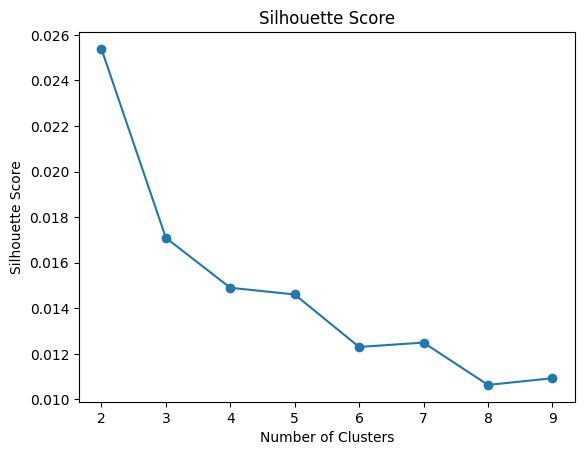

In [87]:
silhouette_scores = []

# The range was changed to start from 2, ensuring at least 2 clusters are formed.
for i in range(2, 10):
    cluster_labels = fcluster(linkage(df, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 10), silhouette_scores, marker='o') # Adjusted x-axis range to match the loop
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [88]:
silhouette_scores = []
for k in range(2, 10):  # Mencoba jumlah cluster dari 2 hingga 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)  # X adalah dataset
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {score}")

Jumlah Cluster: 2, Silhouette Score: 0.05907416956521614
Jumlah Cluster: 3, Silhouette Score: 0.047147556013824414
Jumlah Cluster: 4, Silhouette Score: 0.04639736767276006
Jumlah Cluster: 5, Silhouette Score: 0.04496664590577794
Jumlah Cluster: 6, Silhouette Score: 0.04416767655971816
Jumlah Cluster: 7, Silhouette Score: 0.045150179156661474
Jumlah Cluster: 8, Silhouette Score: 0.043733967250129145
Jumlah Cluster: 9, Silhouette Score: 0.045307178424679656


In [28]:

# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(df)

# Step 2: Add Agglomerative Clustering labels to the original DataFrame
df_inverse['agglo'] = agglo_labels

# show the df
df_inverse.head()

,product_id,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,avg_sales,Cluster,agglo
0,1.0,1.0,190.40,1.7,220.0,479.0,449.0,92.0,784.0,604.0,904.0,446.0,603.0,807.0,252.0,695.0,306.0,535.083333,2,0
1,2.0,4.0,475.60,3.2,903.0,21.0,989.0,861.0,863.0,524.0,128.0,610.0,436.0,176.0,294.0,772.0,353.0,502.250000,0,2
2,3.0,6.0,367.34,4.5,163.0,348.0,558.0,567.0,143.0,771.0,409.0,290.0,828.0,340.0,667.0,267.0,392.0,465.000000,0,2
3,4.0,6.0,301.34,3.9,951.0,725.0,678.0,59.0,15.0,937.0,421.0,670.0,933.0,56.0,157.0,168.0,203.0,418.500000,0,2
4,5.0,0.0,82.23,4.2,220.0,682.0,451.0,649.0,301.0,620.0,293.0,411.0,258.0,854.0,548.0,770.0,257.0,507.833333,2,0


In [57]:
# Function to calculate mode for each cluster
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

# Repeat for Agglomerative Clustering
agglo_summary = df_inverse.groupby(agglo_labels).agg({
     'price': ['mean', 'std', 'min', 'max', mode],           # Harga produk
    'review_score': ['mean', 'std', 'min', 'max', mode],    # Skor ulasan
    'review_count': ['mean', 'std', 'min', 'max', mode],    # Jumlah ulasan
    'sales_month_1': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan pertama
    'sales_month_2': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan kedua
    'sales_month_3': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan ketiga
    'sales_month_4': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan keempat
    'sales_month_5': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan kelima
    'sales_month_6': ['mean', 'std', 'min', 'max', mode],   # Penjualan bulan keenam
    'sales_month_7': ['mean', 'std', 'min', 'max', mode],
    'sales_month_8': ['mean', 'std', 'min', 'max', mode],
    'sales_month_9': ['mean', 'std', 'min', 'max', mode],
    'sales_month_10': ['mean', 'std', 'min', 'max', mode],
    'sales_month_11': ['mean', 'std', 'min', 'max', mode],
    'sales_month_12': ['mean', 'std', 'min', 'max', mode],  # Penjualan bulan terakhir
    'avg_sales': ['mean', 'std', 'min', 'max', mode]       # Penjualan rata-rata
})
agglo_summary = agglo_summary.T
agglo_summary = agglo_summary.rename_axis(index={'agglo': agglo_summary.index.levels[0].name})
agglo_summary

0            1            2
price          mean   247.695807   196.712899   290.205474
               std    144.475445   133.102041   140.704583
               min      8.440000     7.290000    10.620000
               max    499.860000   495.030000   496.520000
               mode   248.850000     7.290000   318.530000
review_score   mean     3.098952     1.966807     3.794035
               std      1.165208     0.660928     0.802680
               min      1.000000     1.000000     1.200000
               max      5.000000     3.900000     5.000000
               mode     4.500000     1.300000     3.500000
review_count   mean   514.364780   493.264706   574.585965
               std    279.640618   286.420336   277.939901
               min      8.000000     1.000000     1.000000
               max    999.000000   982.000000   998.000000
               mode    66.000000    41.000000   533.000000
sales_month_1  mean   491.364780   487.226891   519.175439
               std    288.673475   288.107866   293.515633
               min      0.000000     0.000000    11.000000
               max   1000.000000   994.000000   999.000000
               mode   752.000000   389.000000   312.000000
sales_month_2  mean   497.230608   550.205882   489.589474
               std    284.643337   286.404651   285.366844
               min      2.000000     7.000000     5.000000
               max   1000.000000   992.000000   998.000000
               mode    58.000000   160.000000   206.000000
sales_month_3  mean   511.287212   503.113445   502.154386
               std    289.745461   297.246874   299.267328
               min      4.000000     0.000000     1.000000
               max    997.000000   998.000000   999.000000
               mode   719.000000   105.000000   286.000000
sales_month_4  mean   505.607966   498.915966   504.933333
               std    290.536571   285.540854   281.923610
               min      3.000000     0.000000     0.000000
               max   1000.000000   998.000000   990.000000
               mode   684.000000   170.000000   662.000000
sales_month_5  mean   493.169811   507.584034   460.164912
               std    285.571421   294.437501   285.091196
               min      0.000000     1.000000     0.000000
               max    999.000000  1000.000000   998.000000
               mode   129.000000   333.000000    12.000000
sales_month_6  mean   481.742138   496.911765   503.849123
               std    293.796567   294.997970   276.838124
               min      0.000000     2.000000     3.000000
               max   1000.000000   998.000000   992.000000
               mode    41.000000    56.000000   254.000000
sales_month_7  mean   508.167715   501.600840   509.592982
               std    294.692435   276.644748   297.516616
               min      0.000000     1.000000     1.000000
               max    999.000000  1000.000000   999.000000
               mode    72.000000   591.000000   215.000000
sales_month_8  mean   494.425577   503.525210   522.417544
               std    284.951266   299.617473   290.208687
               min      5.000000     5.000000     8.000000
               max    998.000000   992.000000  1000.000000
               mode   395.000000   798.000000   117.000000
sales_month_9  mean   494.983229   485.705882   492.031579
               std    276.841147   298.628888   296.409183
               min      2.000000     2.000000     0.000000
               max   1000.000000   993.000000  1000.000000
               mode   616.000000   463.000000   712.000000
sales_month_10 mean   510.270440   507.920168   528.119298
               std    293.862778   292.828916   276.872434
               min      1.000000     3.000000     1.000000
               max    997.000000  1000.000000  1000.000000
               mode   416.000000   202.000000   324.000000
sales_month_11 mean   503.396226   494.516807   519.378947
               std    293.588355   283.133159   285.957812
               min 

In [30]:
cluster_counts = df_inverse['agglo'].value_counts().sort_index()
cluster_counts

,count
agglo,
0,477
1,238
2,285


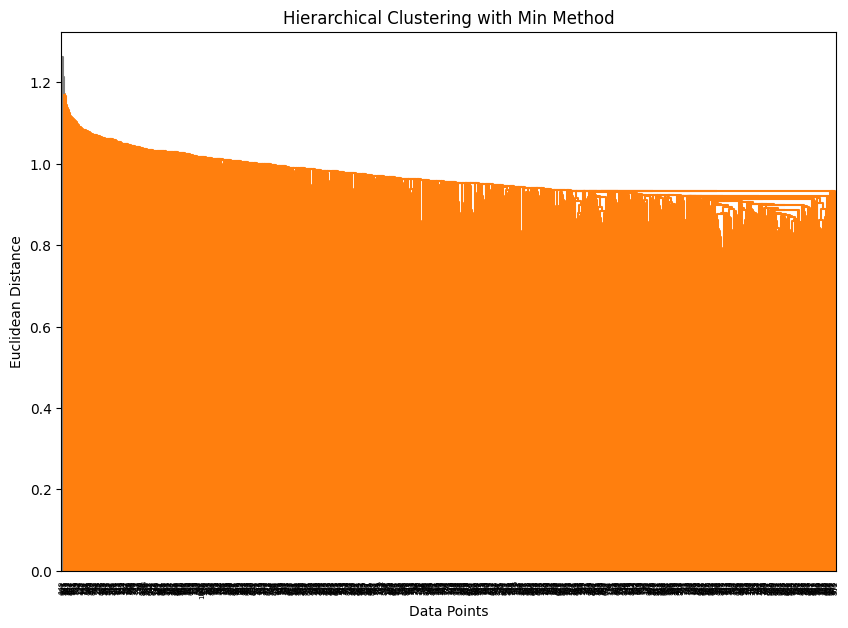

In [89]:
import scipy.cluster.hierarchy as sch
# Min Distance
# Buat linkage matrix
linked = linkage(df, method='single')

# Tentukan jumlah cluster yang diinginkan
n_clusters = 3

# Gunakan fcluster untuk mendapatkan label cluster
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

# Tentukan color_threshold agar sesuai dengan pemotongan
color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,  # Menentukan ketinggian pemotongan sesuai jumlah cluster
           above_threshold_color='grey',     # Warna cabang di atas threshold
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Hierarchical Clustering with Min Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

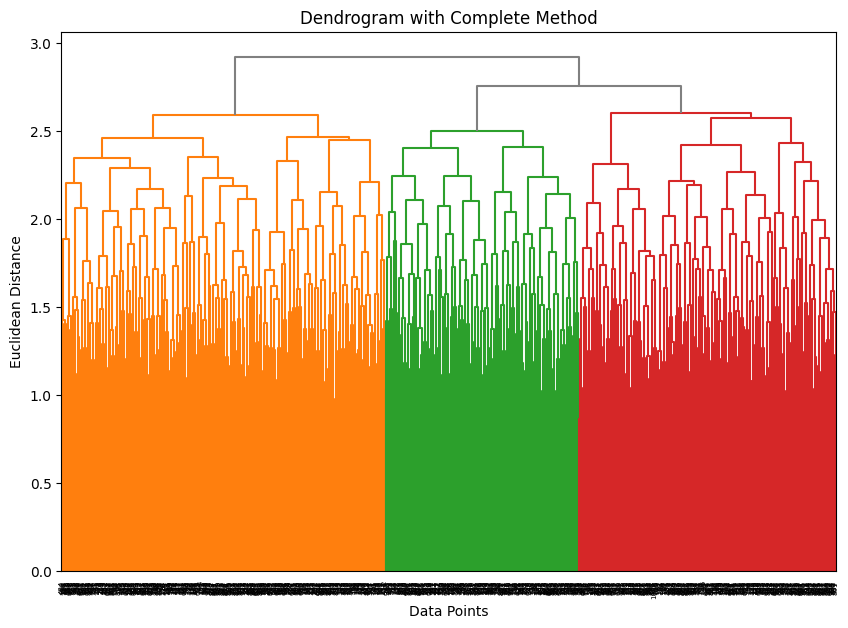

In [90]:
# Max Distance
n_clusters = 3
linked = linkage(df, method='complete', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

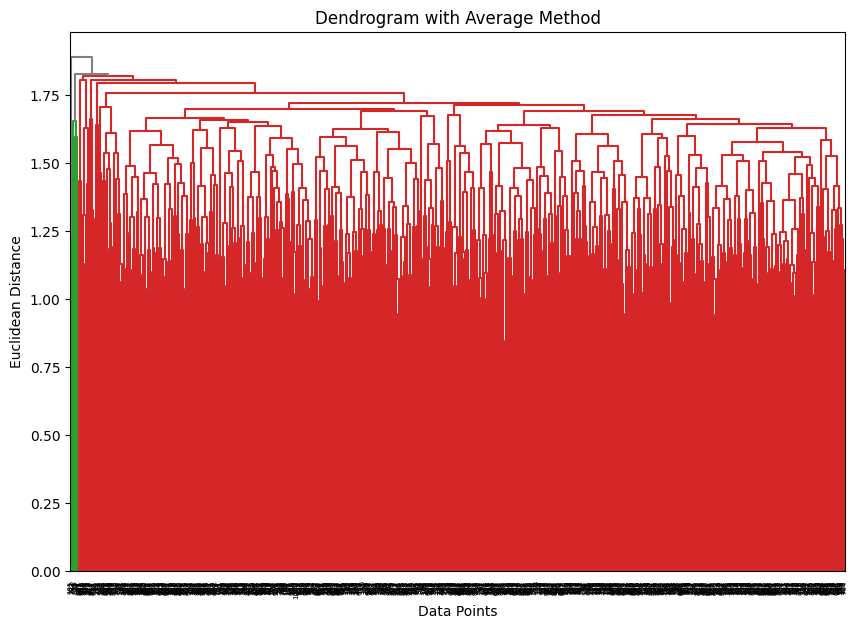

In [95]:
# Average Distance
n_clusters = 3
linked = linkage(df, method='average', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

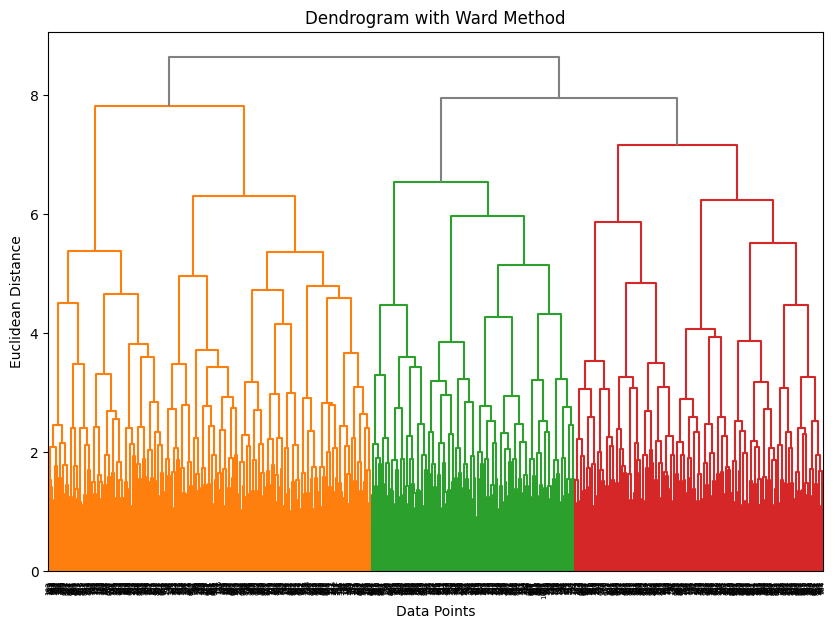

In [92]:
# Ward Method
n_clusters = 3
linked = linkage(df, method='ward', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [93]:

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df)
kmeans_silhouette = silhouette_score(df, kmeans_labels)
print(f"Silhouette Score K-Means Clustering: {kmeans_silhouette}")

# Hierarchical Clustering
linkage_methods = ['ward', 'single', 'complete', 'average']
silhouette_scores = {} # Menyimpan silhouette score untuk setiap metode

for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=3, linkage=method)
    hc_labels = hc.fit_predict(df)
    hc_silhouette = silhouette_score(df, hc_labels)
    silhouette_scores[method] = hc_silhouette # Menyimpan skor
    print(f"Silhouette Score Hierarchical Clustering ({method}): {hc_silhouette}")


Silhouette Score K-Means Clustering: 0.047147556013824414
Silhouette Score Hierarchical Clustering (ward): 0.017093593986549704
Silhouette Score Hierarchical Clustering (single): 0.07268458988881706
Silhouette Score Hierarchical Clustering (complete): 0.011153926278216954
Silhouette Score Hierarchical Clustering (average): 0.031276496517576156


# **CLASSIFICATION**

In [36]:
X = df_class.drop(['avg_sales', 'product_id', 'review_score', 'review_count'], axis=1)
y = df_class['avg_sales']

In [37]:
bins = [0, 0.33, 0.66, 1]
labels = ['Low', 'Medium', 'High']
y = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

In [38]:
smoteenn = SMOTEENN(random_state=42)
X_train_sm, y_train_sm = smoteenn.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.2, random_state=42)

In [40]:
X_train.shape, X_test.shape

((1307, 14), (327, 14))

In [41]:
model = DecisionTreeClassifier(random_state=42,criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [42]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8899


In [43]:
y_train_gini = model.predict(X_train)
test_acc = accuracy_score(y_test, y_pred)
training_acc = accuracy_score(y_train, y_train_gini)
print(f"Training set score: {training_acc:.4f}")
print(f"Test set score: {accuracy:.4f}")

Training set score: 1.0000
Test set score: 0.8899


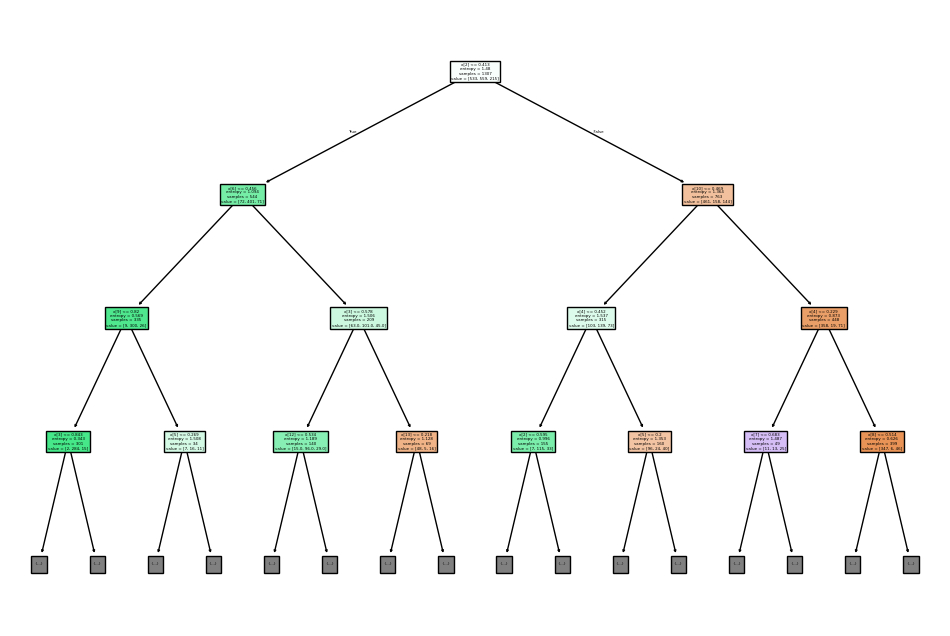

In [44]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, max_depth=3)
plt.show()

In [45]:
model2 = DecisionTreeClassifier(random_state=42, criterion='gini')
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_pred_gini = model2.predict(X_test)

In [47]:
print(f'Model accuracy score with criterion gini index: {accuracy_score(y_test, y_pred_gini):.4f}')

Model accuracy score with criterion gini index: 0.8930


In [48]:
y_train_gini = model2.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_gini)
training_acc = accuracy_score(y_train, y_train_gini)

print(f"Training set score: {training_acc:.4f}")

print(f"Test set score: {test_acc:.4f}")


Training set score: 1.0000
Test set score: 0.8930


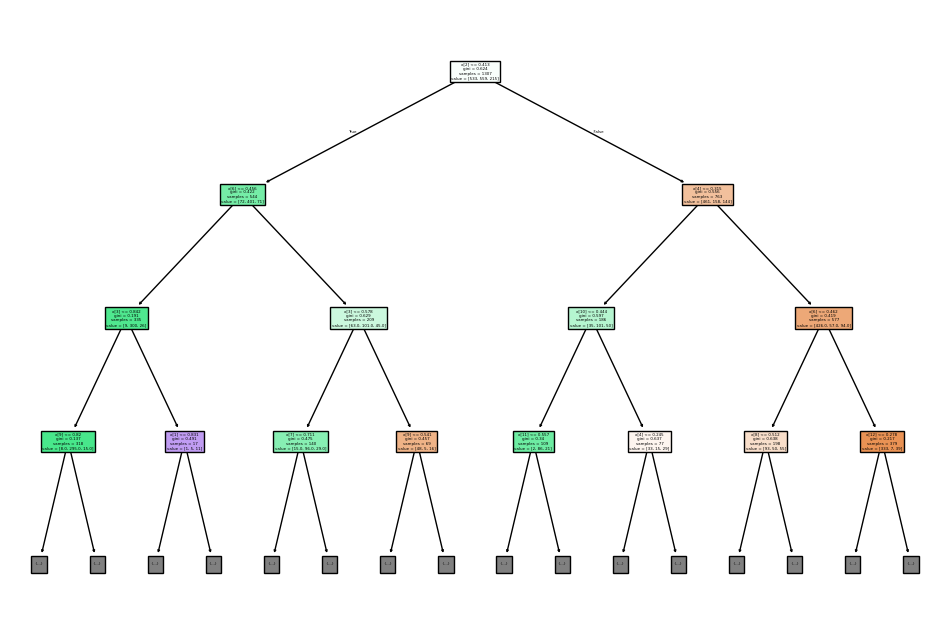

In [49]:
plt.figure(figsize=(12, 8))
plot_tree(model2, filled=True, max_depth=3)
plt.show()

In [50]:
cm_entropy = confusion_matrix(y_test, y_pred)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:")
print(cm_entropy)
print("\nConfusion Matrix Gini:")
print(cm_gini)

Confusion Matrix Entropy:
[[145   0  11]
 [  2 113   6]
 [  9   8  33]]

Confusion Matrix Gini:
[[149   2   5]
 [  2 113   6]
 [ 12   8  30]]


In [51]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred))

print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))

Classification Report Entropy
              precision    recall  f1-score   support

        High       0.93      0.93      0.93       156
         Low       0.93      0.93      0.93       121
      Medium       0.66      0.66      0.66        50

    accuracy                           0.89       327
   macro avg       0.84      0.84      0.84       327
weighted avg       0.89      0.89      0.89       327


Classification Report Gini
              precision    recall  f1-score   support

        High       0.91      0.96      0.93       156
         Low       0.92      0.93      0.93       121
      Medium       0.73      0.60      0.66        50

    accuracy                           0.89       327
   macro avg       0.85      0.83      0.84       327
weighted avg       0.89      0.89      0.89       327



# **Model dengan Gini cenderung lebih unggul dalam hal recall untuk kelas High dan lebih baik dalam klasifikasi kelas Medium dibandingkan dengan model dengan entropi.Model dengan Entropy memberikan hasil yang lebih konsisten dalam precision dan recall antar kelas, tetapi tidak sebaik Gini dalam hal deteksi kelas High.Kedua model menunjukkan kinerja yang sangat baik dalam keseluruhan akurasi dan f1-score, dengan model Gini sedikit lebih kuat dalam mendeteksi kelas High dan Medium.**